In [12]:
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPRegressor
import numpy as np
from datetime import datetime

In [25]:
def NN_tsne(data,model,n_train=500,train_val_rat=0.8):
    model = TSNE(n_components=2)

    t0 = datetime.now()
    assert n_train>100, 'Training on too little data.'
    """ Scaling the data with the MinMax Scaler"""
    print("Scaling the data...")
    scaler = MinMaxScaler()
    _ = scaler.fit(data)
    data_scaled = scaler.transform(data) # Scaling data
    print("Data scaled.")
    """ Seperating out training data """
    n_val = int(n_train*(1-train_val_rat))
    n_train = int(n_train*train_val_rat)
    X_train = data_scaled[:n_train]
    print("Peforming t-SNE fit on training data...")
    X_2d = model.fit_transform(X_train) # A subset of the total data to produce a t-SNE reduction from
    print("Training data generated.")
    X_train_data = X_train[:n_train]
    X_val_data = X_train[n_train:]
    print("Splitting training and validation data...")
    tsne_x_train = X_2d[:n_train,0] # The t-SNE produced x values for training
    tsne_y_train = X_2d[:n_train,1] # The t-SNE produced y values for training
    tsne_x_val = X_2d[n_train:,0] # x values for validation
    tsne_y_val = X_2d[n_train:,1] # y values for validation
    print("Training regressor...")
    regressor = MLPRegressor(max_iter=2000)
    x_reg = regressor.fit(X=X_train_data,y=tsne_x_train)
    tsne_x = x_reg.predict(X=data_scaled)
    y_reg = regressor.fit(X=X_train_data,y=tsne_y_train)
    print("Regressor trained.")
    print("Performing regression on full data...")
    tsne_y = y_reg.predict(X=data_scaled)
    print("Time to run: {}".format(datetime.now()-t0))
    return tsne_x,tsne_y


In [28]:
""" The data """
digits = datasets.load_digits()

""" The t-SNE model """

#tsne_x,tsne_y = NN_tsne(digits.data,tsne,500,.9)
model = TSNE(n_components=2)

data = digits.data
n_train=500
train_val_rat = 0.9

t0 = datetime.now()
assert n_train>100, 'Training on too little data.'
""" Scaling the data with the MinMax Scaler"""
print("Scaling the data...")
scaler = MinMaxScaler()
_ = scaler.fit(data)
data_scaled = scaler.transform(data) # Scaling data
print("Data scaled.")
""" Seperating out training data """
n_val = int(n_train*(1-train_val_rat))
n_train = int(n_train*train_val_rat)
X_train = data_scaled[:n_train]
print("Peforming t-SNE fit on training data...")
X_2d = model.fit_transform(X_train) # A subset of the total data to produce a t-SNE reduction from
print("Training data generated.")
X_train_data = X_train[:n_train]
X_val_data = X_train[n_train:]
print("Splitting training and validation data...")
tsne_x_train = X_2d[:n_train,0] # The t-SNE produced x values for training
tsne_y_train = X_2d[:n_train,1] # The t-SNE produced y values for training
tsne_x_val = X_2d[n_train:,0] # x values for validation
tsne_y_val = X_2d[n_train:,1] # y values for validation
print("Training regressor...")
regressor = MLPRegressor(max_iter=2000)
x_reg = regressor.fit(X=X_train_data,y=tsne_x_train)
tsne_x = x_reg.predict(X=data_scaled)
y_reg = regressor.fit(X=X_train_data,y=tsne_y_train)
print("Regressor trained.")
print("Performing regression on full data...")
tsne_y = y_reg.predict(X=data_scaled)
print("Time to run: {}".format(datetime.now()-t0))

Scaling the data...
Data scaled.
Peforming t-SNE fit on training data...
Training data generated.
Splitting training and validation data...
Training regressor...
Regressor trained.
Performing regression on full data...
Time to run: 0:00:09.174643


Scaling the data...
Data scaled.
Peforming t-SNE fit on training data...
Training data generated.
Splitting training and validation data...
Training regressor...
Regressor trained.
Performing regression on full data...
Time to run: 0:00:08.542281


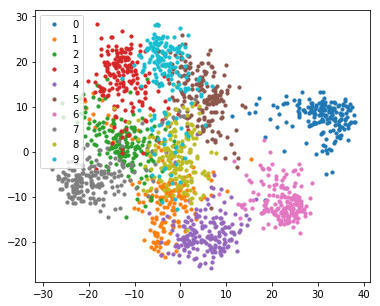

In [29]:
X_2d = np.array([tsne_x,tsne_y]).T
y=digits.target
target_ids = range(len(digits.target_names))
plt.figure(figsize=(6, 5))
for i, label in zip(target_ids, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], label=label,s=10)
plt.legend()
plt.show()

Time to run: 0:00:37.375198


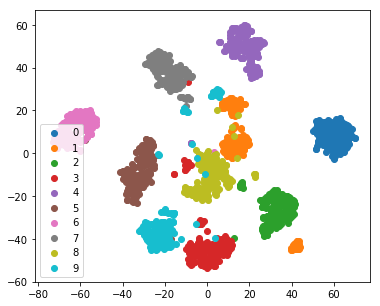

In [18]:
""" Training Data """
X = digits.data
t0 = datetime.now()
X_2d = tsne.fit_transform(X)
print("Time to run: {}".format(datetime.now()-t0))
y = digits.target

target_ids = range(len(digits.target_names))
plt.figure(figsize=(6, 5))
for i, label in zip(target_ids, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], label=label)
plt.legend()
plt.show()